In [22]:
import torch
from pyannote.audio import Pipeline
from huggingface_hub import HfApi
from pyannote.database.util import load_rttm
from pyannote.metrics.diarization import DiarizationErrorRate
from pyannote.core import Segment, notebook, SlidingWindowFeature
from pyannote.database import get_protocol, FileFinder
import warnings
warnings.filterwarnings('ignore')

## __Speaker Diarization__

In [3]:
pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization")

Downloading:   0%|          | 0.00/489 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/17.7M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.98k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [5]:
available_pipelines = [p.modelId for p in HfApi().list_models(filter="pyannote-audio-pipeline")]
available_pipelines

['pyannote/voice-activity-detection',
 'pyannote/speaker-diarization',
 'pyannote/speaker-segmentation',
 'pyannote/overlapped-speech-detection']

In [7]:
preprocessors = {"audio": FileFinder()}
protocol = get_protocol("AMI.SpeakerDiarization.MixHeadset", preprocessors=preprocessors)
test_files = protocol.test()

In [ ]:
# test the performance of the pipeline
test_prediction = []
for test_file in test_files:
    dia = pipeline(test_file['audio'])
    test_prediction.append(dia)

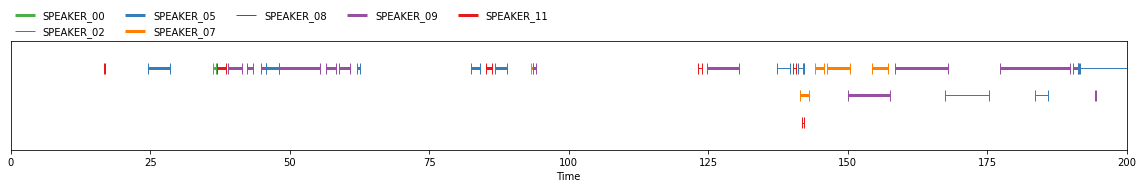

In [20]:
# calculate the diarization error rate
metric = DiarizationErrorRate(collar=0.0, skip_overlap=False)
dia_error = None
for hypothesis, reference in zip(test_prediction, test_files):
    dia_error += metric(reference, hypothesis)
dia_error = dia_error / len(test_prediction)

## __Speech Detection__

In [30]:
pipeline = 

In [31]:
_

2.3093850944513536